In [5]:
#1 Introduction to Predictive Modeling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load and prepare data
data = pd.read_csv('NVDA.csv')

# Check for NaN and infinity values
data = data.replace([np.inf, -np.inf], np.nan)  
data = data.dropna()  

# Separate features and target
X = data[['Open', 'High','Low']]
y = data['Close']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.4f}")


Mean Squared Error: 99.95
R-squared Score: 0.9953


In [6]:
#2 Preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load data from CSV file
data = pd.read_csv('car_price.csv')

# Handle missing values
data['selling_price' ].fillna(data['selling_price'].mean(), inplace=True)
data['engine'].fillna(data['engine' ].median(), inplace=True)

# Remove duplicates
data.drop_duplicates(inplace=True)

# Convert categorical variables to numerical
data = pd.get_dummies(data, columns=['owner', 'fuel' ])
# Scale numerical features
scaler = StandardScaler()
numerical_features = ['selling_price', 'engine' ]
data[numerical_features] = scaler.fit_transform(data[numerical_features])

print(data.head())
print(data.info())

                           name  year  selling_price  km_driven seller_type  \
0        Maruti Swift Dzire VDI  2014      -0.129434     145500  Individual   
1  Skoda Rapid 1.5 TDI Ambition  2014      -0.283360     120000  Individual   
2      Honda City 2017-2020 EXi  2006      -0.691265     140000  Individual   
3     Hyundai i20 Sportz Diesel  2010      -0.562352     127000  Individual   
4        Maruti Swift VXI BSIII  2007      -0.745139     120000  Individual   

  transmission  mileage(km/ltr/kg)    engine max_power  seats  \
0       Manual               23.40 -0.364275        74    5.0   
1       Manual               21.14  0.149081    103.52    5.0   
2       Manual               17.70  0.147028        78    5.0   
3       Manual               23.00 -0.060368        90    5.0   
4       Manual               16.10 -0.261604      88.2    5.0   

   owner_First Owner  owner_Fourth & Above Owner  owner_Second Owner  \
0                  1                           0              

In [ ]:
#3 Features Selection
import pandas as pd
from sklearn. feature_selection import SelectKBest, f_regression
from sklearn. preprocessing import PolynomialFeatures

# Load preprocessed data
data = pd.read_csv('car_price.csv')

X = data.drop('selling_price', axis=1)
y = data['selling_price' ]

# Feature selection using correlation
correlation = X.corr()['engine'].abs().sort_values(ascending=False)
selected_features = correlation[correlation > 0.5].index.tolist()

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly= poly.fit_transform(X[selected_features])
# Select top K features
selector = SelectKBest(score_func=f_regression, k='all')
X_selected = selector.fit_transform(X_poly, y)

print("Selected features:", X.columns[selector.get_support()].tolist())
print("Shape of selected features:", X_selected.shape)

Coefficient: 2.96
Intercept: 2.01
Mean Squared Error: 0.0065
R-squared Score: 0.9924


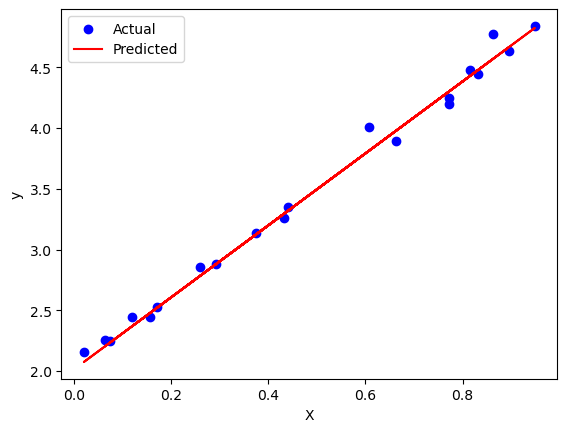

In [7]:
#4 Linear Regression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generate sample data
np.random. seed(42)
X= np.random.rand(100, 1)
y=2+3*X+ np.random.randn(100, 1) * 0.1

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

#
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Coefficient: {model.coef_[0][0] :.2f}")
print(f"Intercept: {model.intercept_[0] :.2f}")
print(f"Mean Squared Error: {mse :.4f}")
print(f"R-squared Score: {r2 :.4f}")

# Plot the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Accuracy: 0.9000
Confusion Matrix:
[[97  7]
 [13 83]]


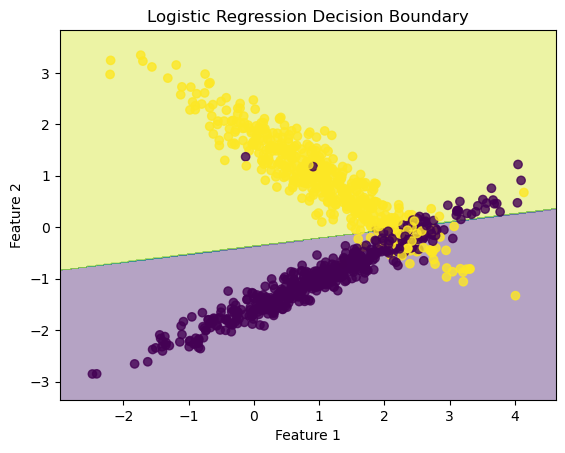

In [8]:
#5 Logistic Regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification

# Generate sample data
X, y =make_classification(n_samples=1000, n_features=2, n_redundant=0,
n_informative=2,

n_clusters_per_class=1, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy :.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot decision boundary
x_min, x_max = X[:, 0].min() -0.5, X[:, 0].max() +0.5
y_min, y_max= X[:, 1].min() -0.5, X[:, 1].max() + 0.5
xx, yy=np.meshgrid(np.arange(x_min, x_max,0.02),
np.arange(y_min, y_max, 0.02))
Z=model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary")
plt.show()

Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



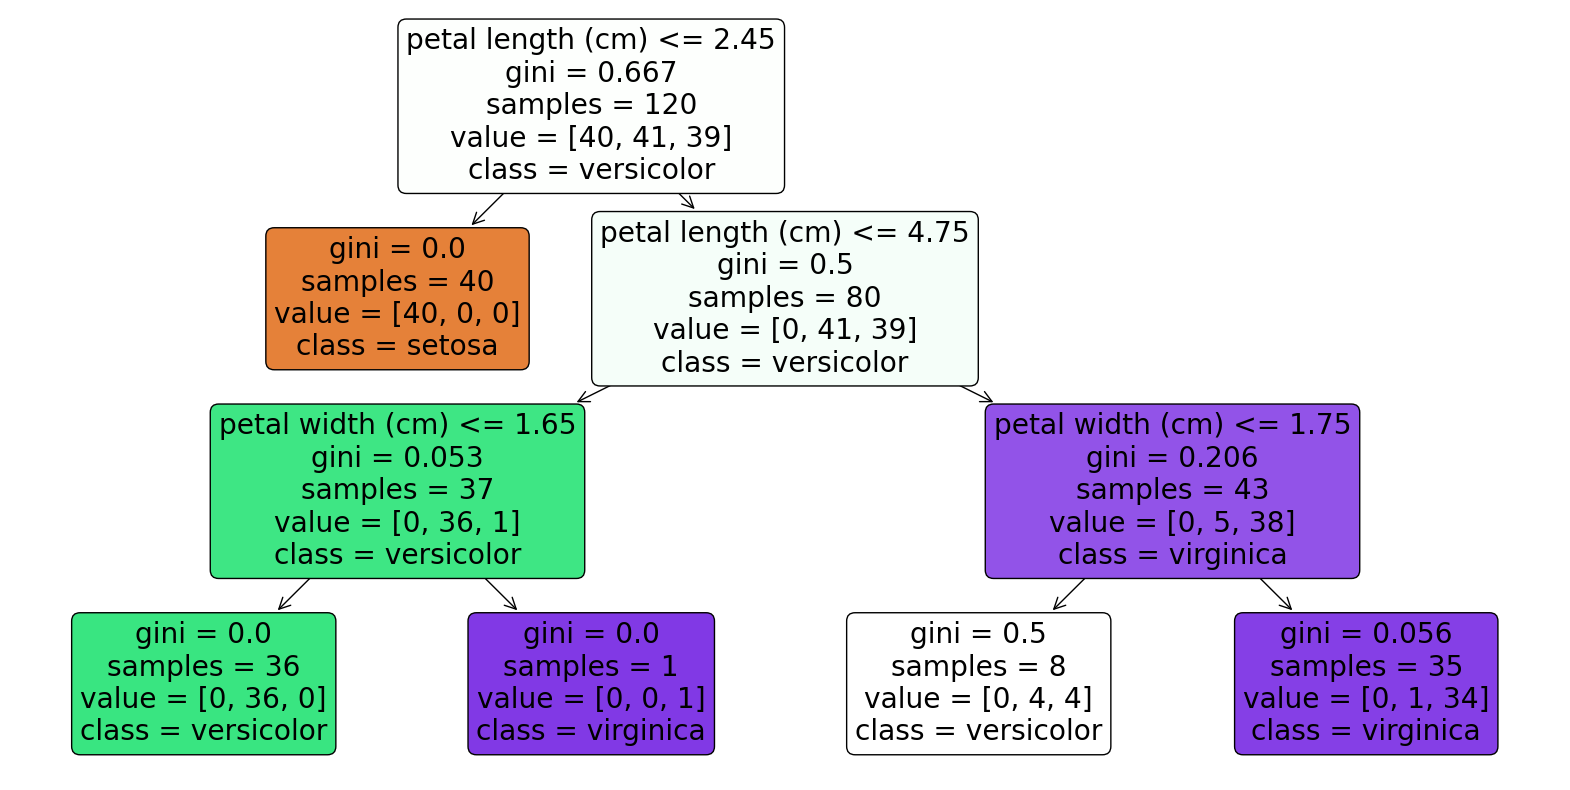

Feature: sepal length (cm), Score: 0.0000
Feature: sepal width (cm), Score: 0.0000
Feature: petal length (cm), Score: 0.9346
Feature: petal width (cm), Score: 0.0654


In [9]:
#6 Decision Tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

#Create and train the model
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy :.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names,filled=True, rounded=True)
plt.show()

# Feature importance
importance = model. feature_importances_
for i, v in enumerate(importance):
    print(f"Feature: {iris.feature_names[i]}, Score: {v :.4f}")

Accuracy: 0.8133
Confusion Matrix:
[[ 73  10   6]
 [ 14 100   0]
 [ 22   4  71]]


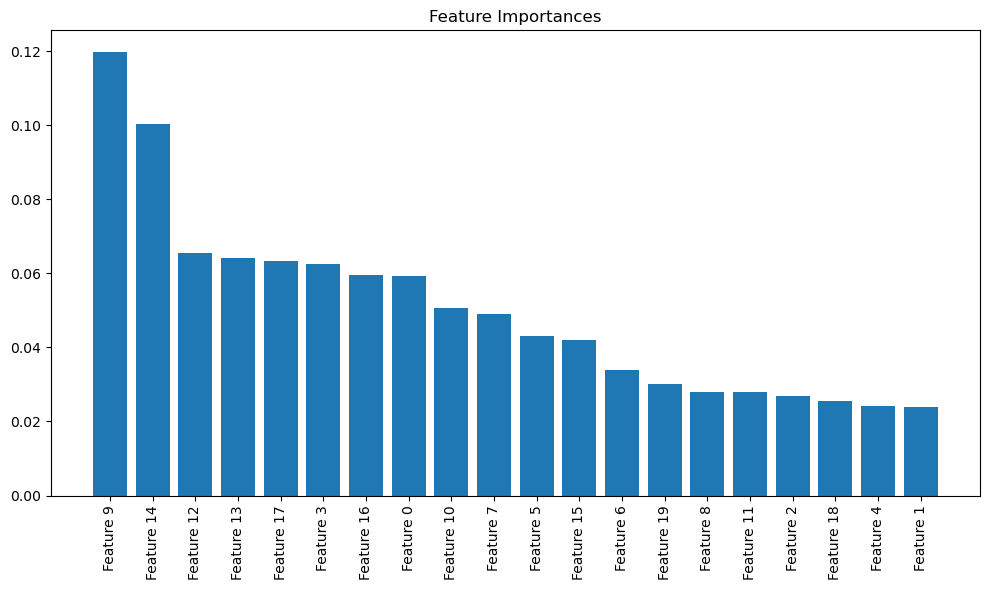

Out-of-bag Score: 0.7643


In [10]:
#7 Random Forest
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=3, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier with out-of-bag estimation
model = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Feature importance
importance = model.feature_importances_
indices = np.argsort(importance)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importance[indices])
plt.xticks(range(X.shape[1]), [f"Feature {i}" for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# Out-of-bag score
oob_score = model.oob_score_
print(f"Out-of-bag Score: {oob_score:.4f}")


Accuracy: 0.9950

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       100
           1       1.00      0.99      0.99       100

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



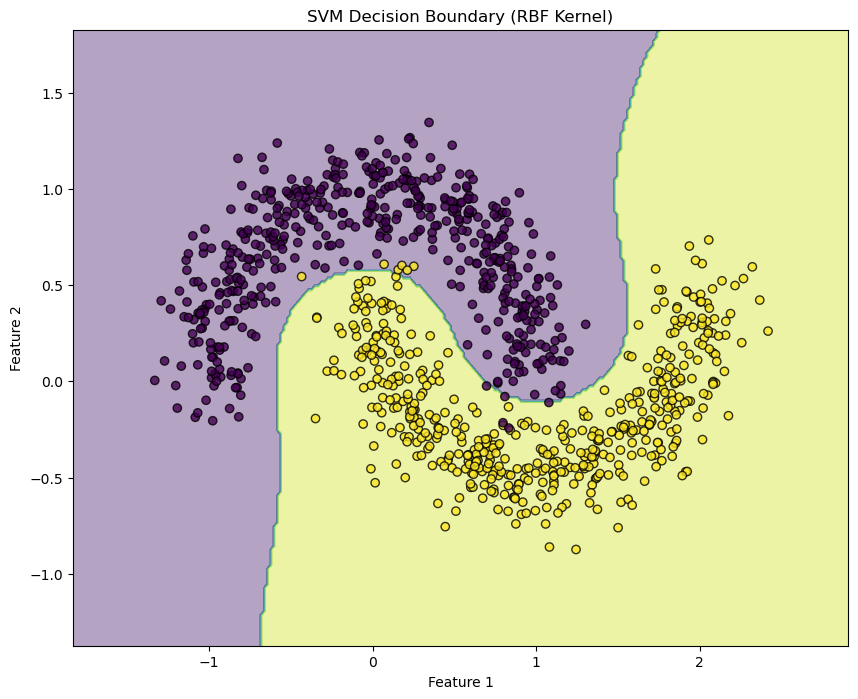

In [11]:
#8 Support Vector Machine
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
import numpy as np

# Generate sample data
X, y = make_moons(n_samples=1000, noise=0.15, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model
model = SVC(kernel='rbf', C=1.0, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot decision boundary
def plot_decision_boundary(X, y, model, scaler, ax=None):
    ax = ax or plt.gca()
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', alpha=0.8)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    return ax

plt.figure(figsize=(10, 8))
plot_decision_boundary(X, y, model, scaler)
plt.title("SVM Decision Boundary (RBF Kernel)")
plt.show()

In [ ]:
#9 KNN
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

# Create and train the model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy :.4f}")

# Plot the effect of K on accuracy
k_range = range(1, 31)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn. fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(k_range, scores)
plt.xlabel( 'Value of K')
plt.ylabel('Testing Accuracy')
plt.title('KNN: Effect of K on Accuracy')
plt.show() 

Accuracy: 0.7950
Confusion Matrix:
[[84  9]
 [32 75]]


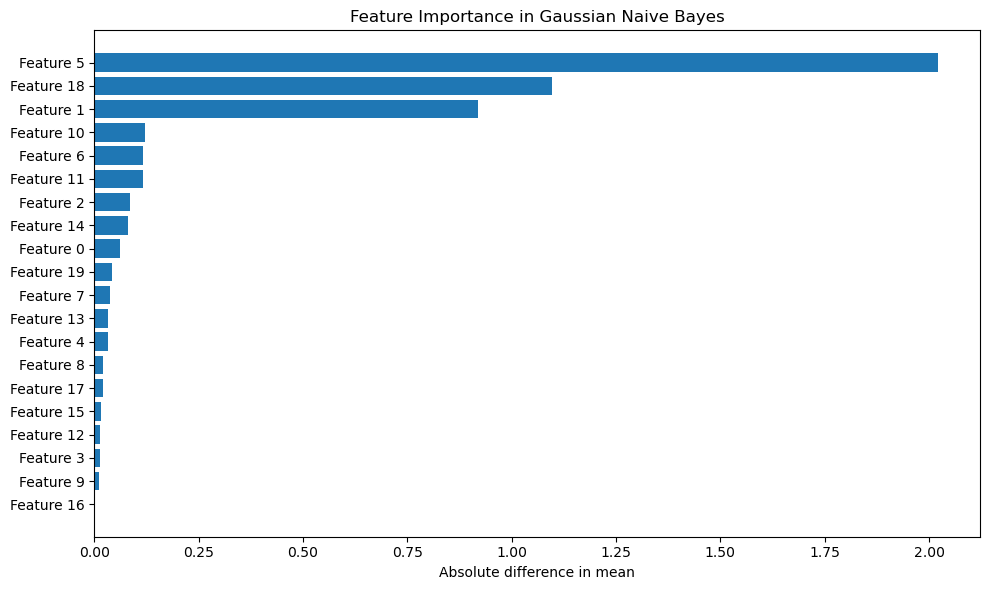

In [13]:
#10 Naive Bayes
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

# Create and train the model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy :.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot feature importance
feature_importance = np.abs(model.theta_[1] - model.theta_[0])
sorted_idx= np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(10, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, [f'Feature {i}' for i in sorted_idx])
plt.xlabel('Absolute difference in mean')
plt.title('Feature Importance in Gaussian Naive Bayes')
plt.tight_layout()
plt.show() 

Accuracy: 0.8850

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       112
           1       0.84      0.92      0.88        88

    accuracy                           0.89       200
   macro avg       0.88      0.89      0.88       200
weighted avg       0.89      0.89      0.89       200



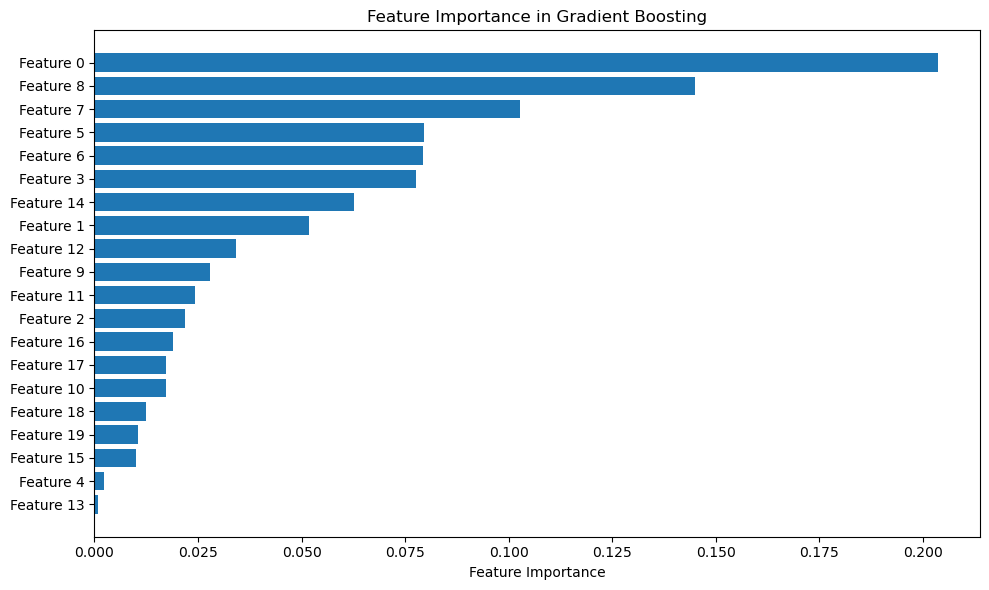

In [14]:
#11 Gradient Boosting
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
n_classes=2, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

# Create and train the model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
max_depth=3, random_state=42)
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy :.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot feature importance
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# Plot feature importance
feature_importance = model.feature_importances_
sorted_idx =np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(10, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center' )
plt.yticks(pos, [f'Feature {i}' for i in sorted_idx])
plt.xlabel('Feature Importance')
plt. title('Feature Importance in Gradient Boosting')
plt. tight_layout ()
plt.show() 

Cross-validation scores: [0.885 0.925 0.905 0.88  0.92 ]
Mean CV score:  0.9030


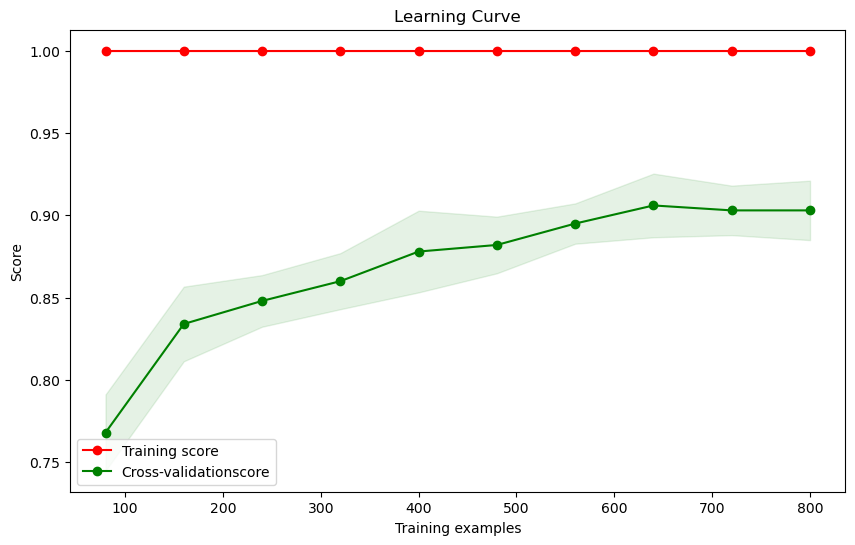

In [15]:
#12 Evaluation
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
n_classes=2, random_state=42)

# Create the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean() : .4f}")

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
model, X, y, train_sizes=np.linspace(0.1, 1.0,10), cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validationscore")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show() 

In [16]:
#13 Hyperparameters
import numpy as np
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,n_classes=2, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Define the model
model = RandomForestClassifier(random_state=42)
# Define the hyperparameter grid
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs =- 1)
grid_search.fit(X_train, y_train)

print("Grid Search Results:")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Perform Random Search
random_search = RandomizedSearchCV(model, param_distributions=param_grid,
                                   n_iter=20, cv=5,random_state=42, n_jobs =- 1)
random_search.fit(X_train, y_train)

print("\nRandom Search Results:")
print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_:.4f}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_score =best_model.score(X_test, y_test)
print(f"\nTest set score with best model: {test_score :.4f}") 

Grid Search Results:
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.9100

Random Search Results:
Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
Best cross-validation score: 0.9100

Test set score with best model: 0.8800


In [ ]:
#14 Real-life:House price 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset (assuming we have a CSV file named 'house_prices.csv')
data = pd.read_csv('house_prices.csv')

# Separate features and target
X = data.drop('Price (in rupees)', axis=1)
y = data['Price (in rupees)']

# Handle missing values
X = X.fillna(X.mean())

# Encode categorical variables
X = pd.get_dummies(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse :. 2f}")
print(f"R-squared Score: {r2 :. 4f}")
# Feature importance
feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).head(10)

print("\nTop 10 Most Important Features:")
print(feature_importance_df)